In [6]:
import numpy as np

def integrand(theta, z, sigma, a, epsilon_0):
    return (sigma * a**2 / (4 * np.pi * epsilon_0 * z**2)) * np.sin(theta)

def numerical_integration(sigma, a, epsilon_0, z, n):
    theta_vals = np.linspace(1 * np.pi / 180, np.pi, n)

    dtheta = theta_vals[1] - theta_vals[0]

    integral = 0
    for theta in theta_vals:
        integral += integrand(theta, z, sigma, a, epsilon_0) * dtheta

    return integral

# Parameters
sigma = 1.0  # surface charge density
a = 1.0  # radius of the spherical shell
epsilon_0 = 8.85e-12  # permittivity of free space (F/m)

# Main loop
n_values = np.arange(0, 501)
z_values = 0.01 * n_values * a

results = []
for z in z_values:
    result = numerical_integration(sigma, a, epsilon_0, z, n=100)
    results.append(result)

# Printout of results
for n, z, result in zip(n_values, z_values, results):
    print(f"n = {n}, z = {z}, E = {result}")


n = 0, z = 0.0, E = inf
n = 1, z = 0.01, E = 179832236752059.6
n = 2, z = 0.02, E = 44958059188014.9
n = 3, z = 0.03, E = 19981359639117.734
n = 4, z = 0.04, E = 11239514797003.725
n = 5, z = 0.05, E = 7193289470082.388
n = 6, z = 0.06, E = 4995339909779.434
n = 7, z = 0.07, E = 3670045648001.217
n = 8, z = 0.08, E = 2809878699250.931
n = 9, z = 0.09, E = 2220151071013.0825
n = 10, z = 0.1, E = 1798322367520.597
n = 11, z = 0.11, E = 1486216832661.6506
n = 12, z = 0.12, E = 1248834977444.8584
n = 13, z = 0.13, E = 1064096075455.9742
n = 14, z = 0.14, E = 917511412000.3042
n = 15, z = 0.15, E = 799254385564.7097
n = 16, z = 0.16, E = 702469674812.7328
n = 17, z = 0.17, E = 622256874574.6006
n = 18, z = 0.18, E = 555037767753.2706
n = 19, z = 0.19, E = 498150240310.4146
n = 20, z = 0.2, E = 449580591880.14923
n = 21, z = 0.21, E = 407782849777.91315
n = 22, z = 0.22, E = 371554208165.41266
n = 23, z = 0.23, E = 339947517489.7158
n = 24, z = 0.24, E = 312208744361.2146
n = 25, z = 0.25, E

/var/folders/b4/ng56s7nx09966zxr158qbcd80000gn/T/ipykernel_31298/2000949658.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return (sigma * a**2 / (4 * np.pi * epsilon_0 * z**2)) * np.sin(theta)


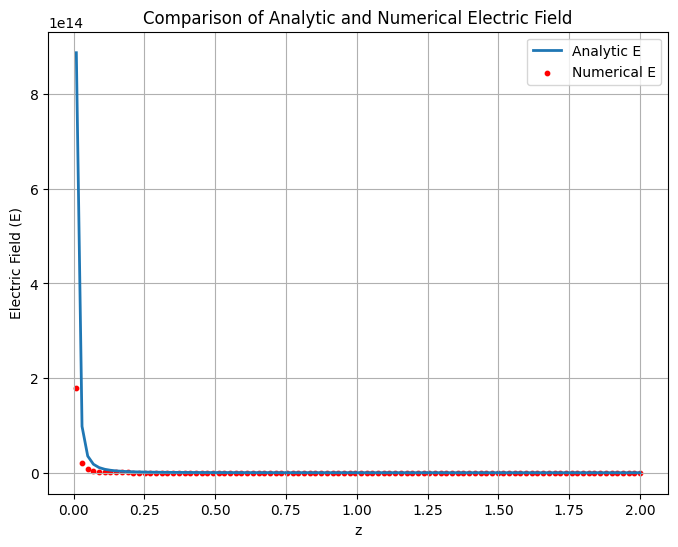

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
"""These parameters are assumed for the calculation purposes."""
sigma = 1.0  # surface charge density
a = 1.0  # radius of the spherical shell
epsilon_0 = 8.85e-12  # permittivity of free space (F/m)

# Values of z for the graph
z_values = np.linspace(0.01 * a, 2 * a, 100)  # Adjust the number of points for a smoother curve

# Analytic calculation of E as a function of z
analytic_E = (sigma * np.pi * a**2) / (4 * epsilon_0 * z_values**2)

# Numerical calculation of E using the code from Part II
results = []
for z in z_values:
    result = numerical_integration(sigma, a, epsilon_0, z, n=100)  # Use the same numerical_integration function
    results.append(result)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(z_values, analytic_E, label="Analytic E", linestyle='-', linewidth=2)
plt.scatter(z_values, results, label="Numerical E", marker='o', color='red', s=10)
plt.xlabel("z")
plt.ylabel("Electric Field (E)")
plt.title("Comparison of Analytic and Numerical Electric Field")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


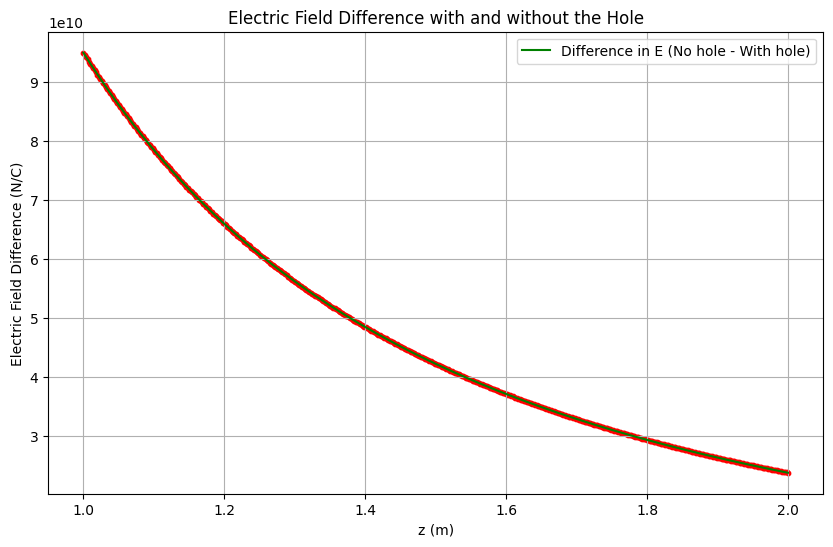

In [8]:
import numpy as np
import matplotlib.pyplot as plt


sigma = 1.0  # surface charge density
a = 1.0  # radius of the spherical shell
epsilon_0 = 8.85e-12  # permittivity of free space
Q = 4 * np.pi * a**2 * sigma  # total charge on the sphere

# Analytic E-field without the hole
def E_no_hole(z):
    return (1 / (4 * np.pi * epsilon_0)) * (Q / z**2)

# Calculate E-field differences
z_values = np.linspace(a, 2 * a, 500)  # z from a to 2a
E_with_hole = [numerical_integration(sigma, a, epsilon_0, z, n=100) for z in z_values]
E_without_hole = [E_no_hole(z) for z in z_values]
E_difference = np.abs(np.array(E_without_hole) - np.array(E_with_hole))

# Plotting the difference
plt.figure(figsize=(10, 6))
plt.plot(z_values, E_difference, label='Difference in E (No hole - With hole)', color='green')
plt.scatter(z_values, E_difference, color='red', s=10)  # scatter plot to show individual values
plt.xlabel('z (m)')
plt.ylabel('Electric Field Difference (N/C)')
plt.title('Electric Field Difference with and without the Hole')
plt.legend()
plt.grid(True)
plt.show()
